<a href="https://colab.research.google.com/github/nnajeh/Aireline-Passengers-Prediction-LSTM/blob/master/aireline-predict-regression-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load libraries
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load data
dataframe = pandas.read_csv('/content/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# fix random seed for reproducibility
numpy.random.seed(7)


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX = []
  dataY = []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [89]:

# split dataset into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))
  

95 48


In [0]:
# reshape dataset
look_back = 10

# Create a dataset of training dataset
trainX, trainY = create_dataset(train, look_back)

# Create a dataset of testing dataset
testX, testY = create_dataset(test, look_back)


In [79]:
# create and fit the LSTM network
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
 - 2s - loss: 52490.4315
Epoch 2/200
 - 0s - loss: 34217.8398
Epoch 3/200
 - 0s - loss: 21697.7194
Epoch 4/200
 - 0s - loss: 12092.8126
Epoch 5/200
 - 0s - loss: 5721.5905
Epoch 6/200
 - 0s - loss: 2647.9467
Epoch 7/200
 - 0s - loss: 1655.1246
Epoch 8/200
 - 0s - loss: 1470.3057
Epoch 9/200
 - 0s - loss: 1417.9069
Epoch 10/200
 - 0s - loss: 1397.4074
Epoch 11/200
 - 0s - loss: 1402.9109
Epoch 12/200
 - 0s - loss: 1397.4685
Epoch 13/200
 - 0s - loss: 1394.3721
Epoch 14/200
 - 0s - loss: 1388.5292
Epoch 15/200
 - 0s - loss: 1377.6539
Epoch 16/200
 - 0s - loss: 1372.4525
Epoch 17/200
 - 0s - loss: 1308.4792
Epoch 18/200
 - 0s - loss: 1280.2375
Epoch 19/200
 - 0s - loss: 1249.5832
Epoch 20/200
 - 0s - loss: 1237.2716
Epoch 21/200
 - 0s - loss: 1214.4454
Epoch 22/200
 - 0s - loss: 1195.2760
Epoch 23/200
 - 0s - loss: 1171.3811
Epoch 24/200
 - 0s - loss: 1170.3862
Epoch 25/200
 - 0s - loss: 1144.3053
Epoch 26/200
 - 0s - loss: 1147.5614
Epoch 27/200
 - 0s - loss: 1130.8596
Epoch 

In [80]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 343.49 MSE (18.53 RMSE)
Test Score: 1332.73 MSE (36.51 RMSE)


In [81]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 343.49 MSE (18.53 RMSE)
Test Score: 1332.73 MSE (36.51 RMSE)


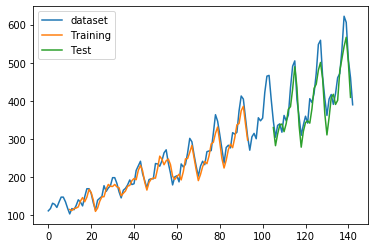

In [86]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset, label="dataset")
plt.plot(trainPredictPlot, label="Training")
plt.plot(testPredictPlot, label="Test")
plt.legend();